In [ ]:
import cv2
import mediapipe as mp
from math import hypot
from ctypes import cast, POINTER
from comtypes import CLSCTX_ALL
from pycaw.pycaw import AudioUtilities, IAudioEndpointVolume
import numpy as np

cap = cv2.VideoCapture(0)

mpHands = mp.solutions.hands
hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils

devices = AudioUtilities.GetSpeakers()
interface = devices.Activate(IAudioEndpointVolume._iid_, CLSCTX_ALL, None)
volume = cast(interface, POINTER(IAudioEndpointVolume))

volMin, volMax = volume.GetVolumeRange()[:2]

while True:
    success, img = cap.read()
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = hands.process(imgRGB)

    lmList = []
    if results.multi_hand_landmarks:
        for handlandmark in results.multi_hand_landmarks:
            for id, lm in enumerate(handlandmark.landmark):
                h, w, _ = img.shape
                cx, cy = int(lm.x * w), int(lm.y * h)
                lmList.append([id, cx, cy])
            mpDraw.draw_landmarks(img, handlandmark, mpHands.HAND_CONNECTIONS)

    if lmList != []:
        x1, y1 = lmList[4][1], lmList[4][2]
        x2, y2 = lmList[8][1], lmList[8][2]

        cv2.circle(img, (x1, y1), 4, (255, 0, 0), cv2.FILLED)
        cv2.circle(img, (x2, y2), 4, (255, 0, 0), cv2.FILLED)
        cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

        length = hypot(x2 - x1, y2 - y1)

        vol = np.interp(length, [15, 220], [volMin, volMax])
        print(vol, length)
        volume.SetMasterVolumeLevel(vol, None)

        # Hand range 15 - 220
        # Volume range -63.5 - 0.0

    cv2.imshow('Image', img)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break







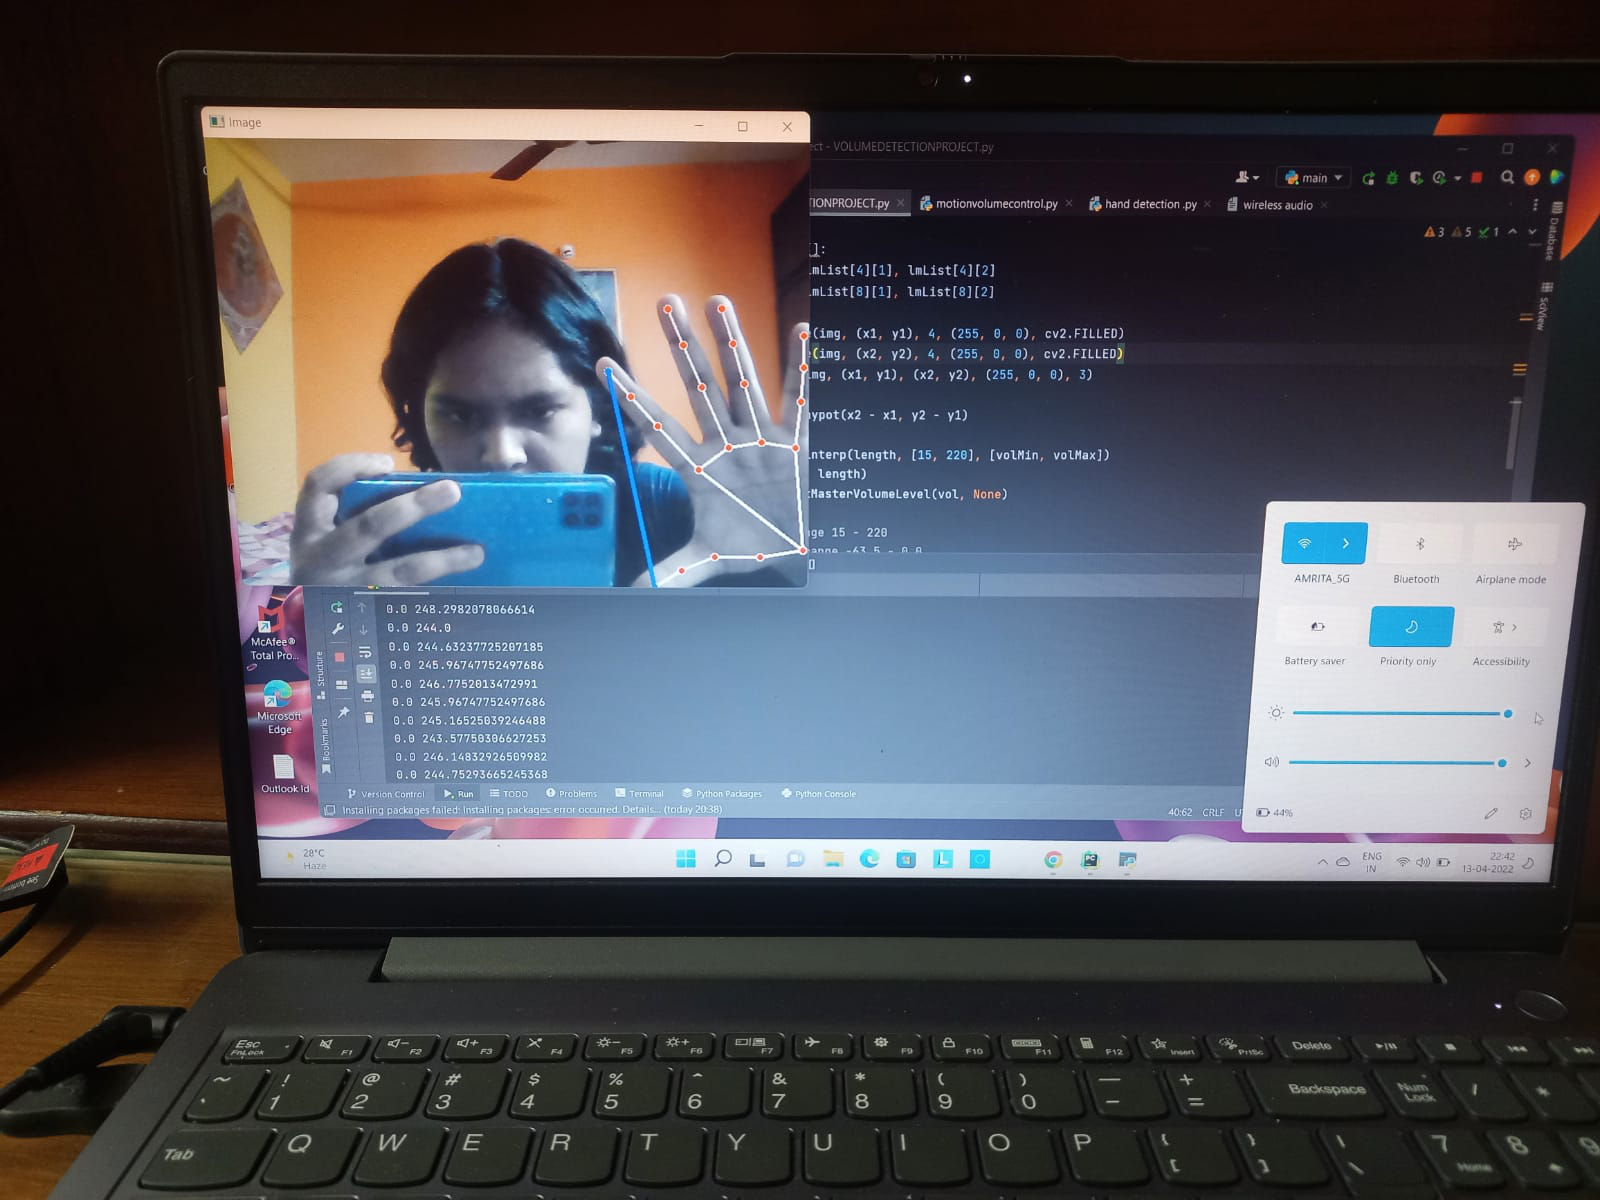

In [2]:
from PIL import Image
img=Image.open('INCREASE')
img

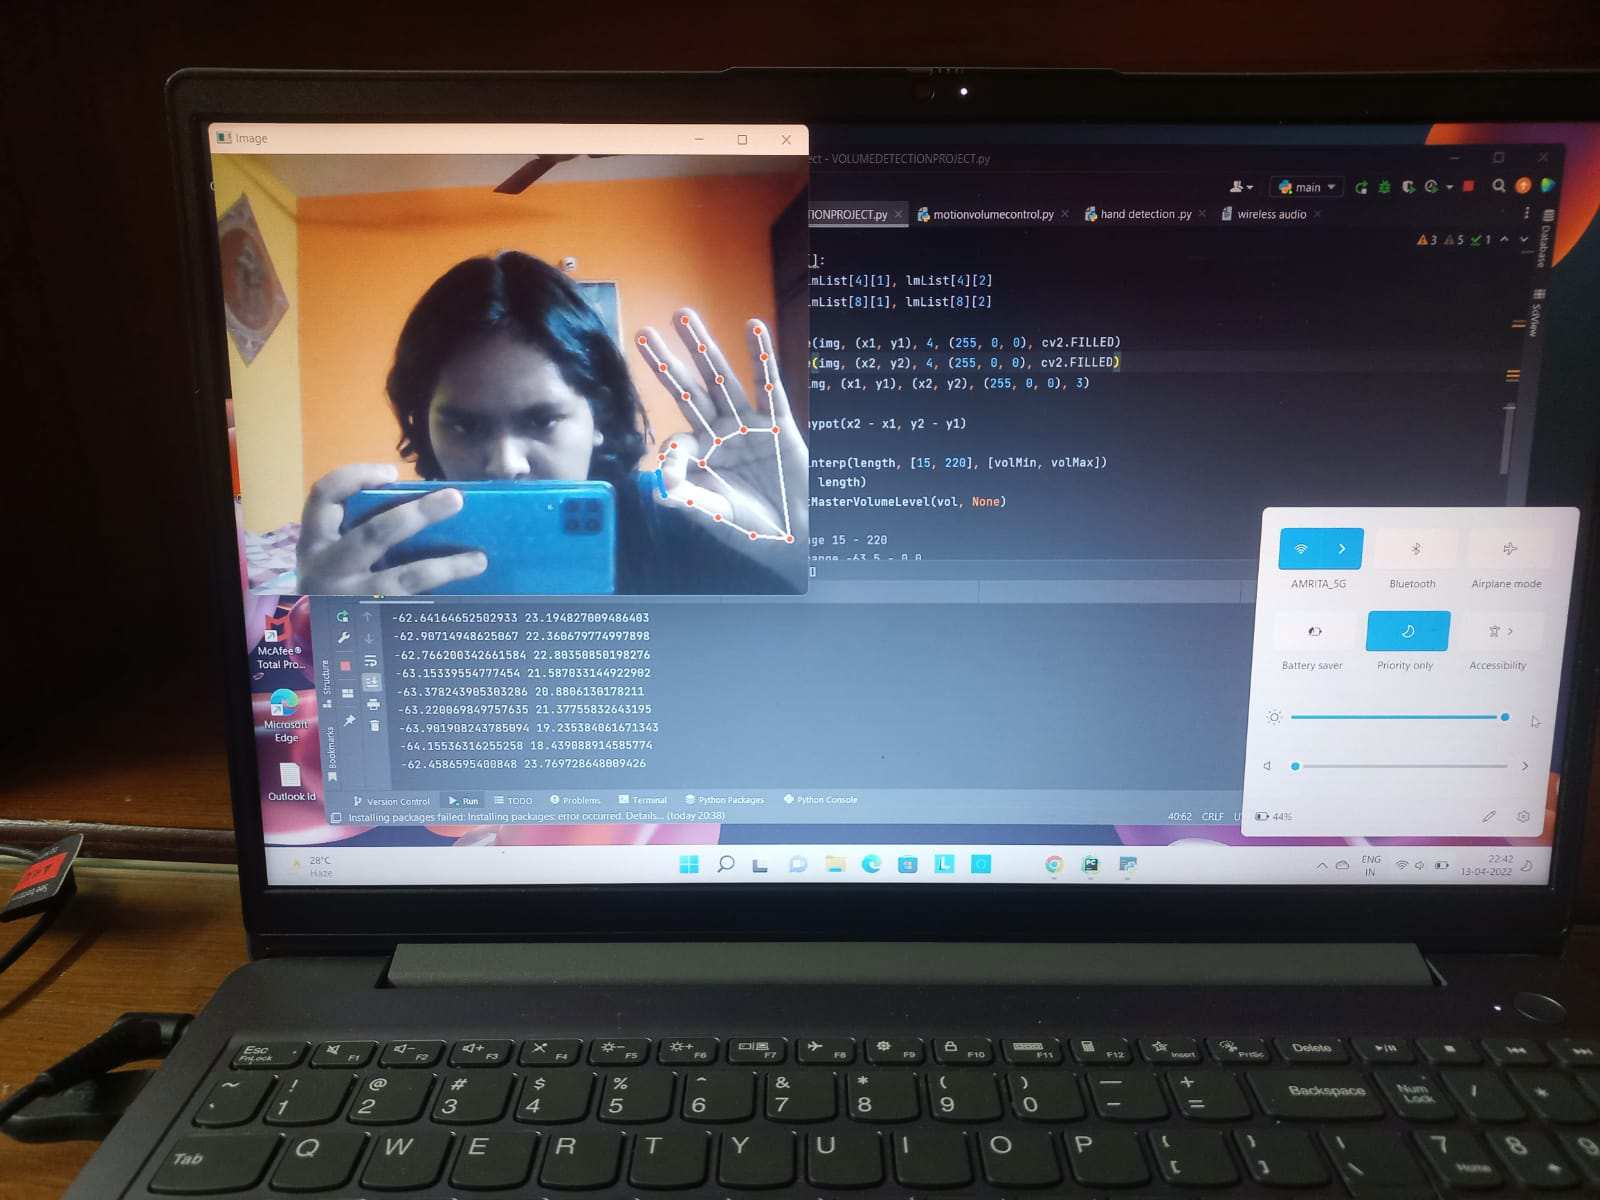

In [3]:
from PIL import Image
img=Image.open('DECREASE')
img